# Linear Regression: Vegetable Oil Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv("../Vegetable Oil Analysis/MPOB_data2.csv")
print(data.shape)
data.head()

(156, 10)


,MonthYear,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
0,1/1/2006,424,532,930,591,733,569,750,445,407
1,2/1/2006,445,535,921,595,723,591,761,430,405
2,3/1/2006,440,539,902,606,742,575,807,410,431
3,4/1/2006,439,540,899,659,796,578,840,394,437
4,5/1/2006,440,588,892,679,838,583,841,408,447


In [2]:
data.dtypes

MonthYear       object
CrudePalmOil     int64
SoyabeanOil      int64
GroundnutOil     int64
SunflowerOil     int64
RapeseedOil      int64
CoconutOil       int64
FishOil          int64
Tallow           int64
Lard             int64
dtype: object

In [3]:
data['MonthYear'] = pd.DatetimeIndex(data['MonthYear'])
data.dtypes

MonthYear       datetime64[ns]
CrudePalmOil             int64
SoyabeanOil              int64
GroundnutOil             int64
SunflowerOil             int64
RapeseedOil              int64
CoconutOil               int64
FishOil                  int64
Tallow                   int64
Lard                     int64
dtype: object

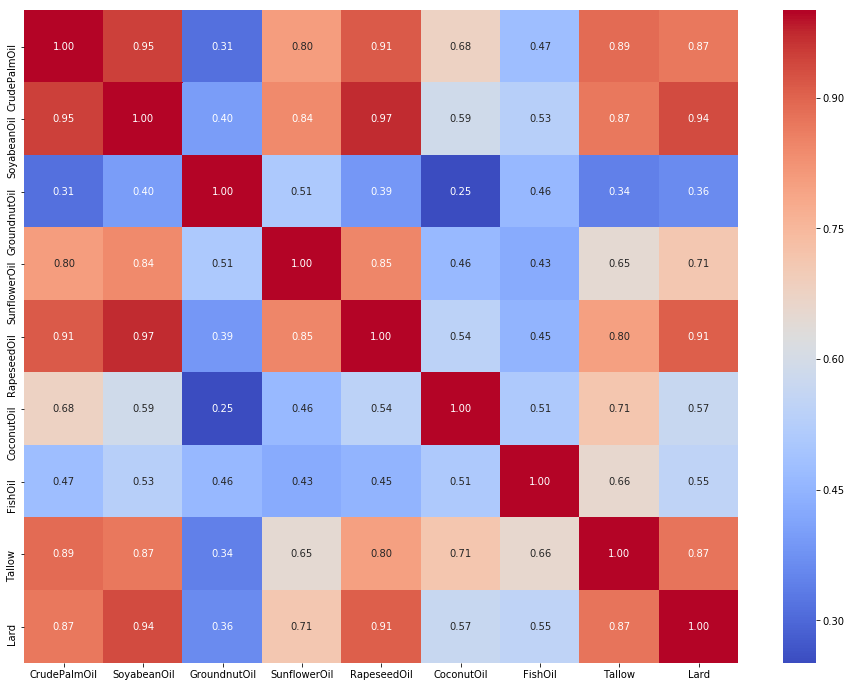

In [4]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.savefig("Correlation")
plt.show()

In [5]:
X = data['SoyabeanOil'].values
print(X)

[ 532  535  539  540  588  601  630  629  602  615  675  699  697  714
  718  761  788  831  885  909  959 1012 1139 1164 1276 1426 1476 1425
 1436 1537 1511 1323 1226  928  824  738  791  748  727  800  892  896
  836  886  846  897  931  933  924  915  920  902  865  859  907 1002
 1042 1154 1141 1232 1374 1365 1307 1314 1294 1324 1337 1330 1309 1220
 1217 1203 1218 1255 1287 1310 1218 1178 1239 1249 1288 1175 1140 1163
 1190 1175 1116 1095 1074 1043  995  997 1024  987  996  989  943  983
 1002  999  966  936  888  857  851  835  830  820  799  773  748  749
  781  793  753  730  727  742  726  761  726  758  761  796  791  798
  789  814  829  858  880  907  872  835  813  790  827  827  834  855
  883  867  881  866  864  842  834  827  793  786  775  766  757    0
    0    0]


In [6]:
Y = data['CrudePalmOil'].values
print(Y)

[ 424  445  440  439  440  437  471  510  497  507  547  583  599  605
  622  710  772  807  811  821  835  881  952  950 1059 1178 1249 1174
 1208 1213 1128  884  771  545  488  503  562  572  598  700  801  726
  639  723  674  680  725  791  795  798  832  830  811  798  807  905
  912  984 1109 1229 1281 1292 1180 1149 1159 1133 1088 1083 1068  994
 1053 1026 1061 1106 1152 1181 1085  998 1015  995  973  839  823  776
  841  863  854  842  849  861  833  828  820  859  921  912  865  906
  961  911  894  858  841  766  709  722  731  693  685  689  672  662
  658  671  636  551  538  584  558  568  565  640  686  722  706  683
  651  736  756  716  751  788  809  774  736  685  727  677  663  674
  724  721  716  672  677  663  681  664  660  634  590  561  551    0
    0    0]


In [7]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.8352398790103015 1.0182196549235414


There we have our coefficients.

CrudePalmOil = 1.0182196549235414 + 0.8352398790103015 * SoyabeanOil

That is our linear model.
  

Now we will see this graphically.

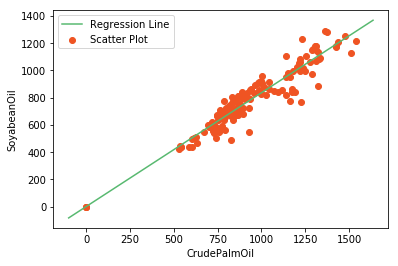

In [8]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('CrudePalmOil')
plt.ylabel('SoyabeanOil')
plt.savefig("CrudePalmOil vs SoyabeanOil")
plt.legend()
plt.show()

R2 Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find R^2R2 Score. 
In general, the higher the R-squared, the better the model fits your data.

Coefficient of Determination (R^2) → It is a measure of how variance in y is explained by the regression model. Often if a model traces close to the actual values then Coefficient of Determination is high (0.85– ~0.9999) else the model needs to be improved upon. Below picture will help in understanding the case.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)

mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.43293517595194
0.9008404452506218


Test prediction

In [10]:
Y_pred = reg.predict(532)
print(Y_pred)

[445.36583529]


In [11]:
data.head()

,MonthYear,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
0,2006-01-01,424,532,930,591,733,569,750,445,407
1,2006-02-01,445,535,921,595,723,591,761,430,405
2,2006-03-01,440,539,902,606,742,575,807,410,431
3,2006-04-01,439,540,899,659,796,578,840,394,437
4,2006-05-01,440,588,892,679,838,583,841,408,447
